In [275]:
import pandas as pd
import numpy as np

# 1. Определить два вектора, представляющие собой число автомобилей,
# припаркованных в течении 5 рабочих дней у бизнес-центра на уличной стоянке и в подземном гараже.
| День        | Улица | Гараж |
|:------------|------:|------:|
| Понедельник |    80 |   100 |
| Вторник     |    98 |    82 |
| Среда       |    75 |   105 |
| Четверг     |    91 |    89 |
| Пятница     |    78 |   102 |
# Найти и интерпретировать корреляцию между переменными «Улица» и
# «Гараж» (подсчитать корреляцию по Пирсону).

In [276]:
input_data = {
    'day': ['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница'],
    'street': [80, 98, 75, 91, 78],
    'garage': [100, 82, 105, 89, 102]}
df = pd.DataFrame(input_data)
df

,day,street,garage
0,Понедельник,80,100
1,Вторник,98,82
2,Среда,75,105
3,Четверг,91,89
4,Пятница,78,102


In [277]:
df['street'].corr(df['garage']) # сильная отрицательная

-0.9999999999999998

# 2. Построить диаграмму рассеяния.

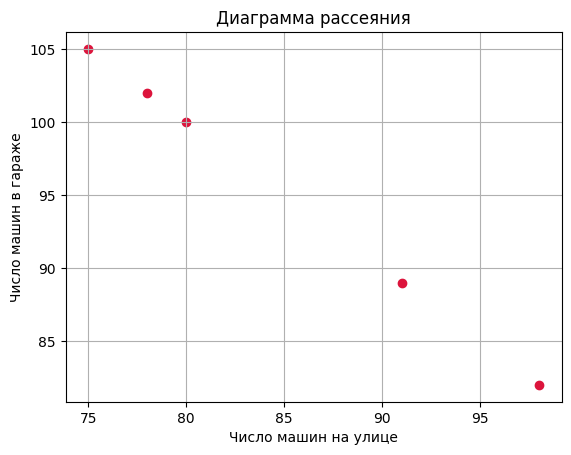

In [278]:
import matplotlib.pyplot as plt

plt.grid(True)
plt.title('Диаграмма рассеяния')
plt.xlabel('Число машин на улице')
plt.ylabel('Число машин в гараже')
plt.scatter(df['street'], df['garage'], marker='o', color='crimson');

# 3. Загрузить bitcoin.csv.

In [279]:
bitcoin_data = pd.read_csv('bitcoin.csv', sep=',')
bitcoin_data.drop(bitcoin_data.columns[[0]], axis=1, inplace=True)
from datetime import datetime
def f(date_str):
    return datetime.strptime(date_str, '%Y-%m-%d').toordinal()

bitcoin_data['time_days'] = bitcoin_data['time'].apply(f)
bitcoin_data.head()

,time,high,low,open,volumefrom,volumeto,close,time_days
0,2015-12-20,462.76,431.10,461.20,121531.64,54316484.95,441.78,735952
1,2015-12-21,445.54,423.99,441.78,121990.88,53270215.60,437.59,735953
2,2015-12-22,443.22,433.25,437.59,65785.54,28845536.39,437.03,735954
3,2015-12-23,444.78,434.28,437.03,63247.04,27877349.10,442.43,735955
4,2015-12-24,460.62,441.76,442.43,79604.01,36096662.15,452.98,735956


# 4. Убрать из данных для обучения модели последние 14 дней.

In [280]:
train_data = bitcoin_data[:-14]
test_data = bitcoin_data[-14:]
test_data

,time,high,low,open,volumefrom,volumeto,close,time_days
1987,2021-05-29,37307.10,33666.06,35680.92,60616.25,2.127790e+09,34611.58,737939
1988,2021-05-30,36481.62,33400.65,34611.58,37522.16,1.325408e+09,35662.59,737940
1989,2021-05-31,37512.80,34202.86,35662.59,50306.62,1.821663e+09,37290.83,737941
1990,2021-06-01,37910.19,35733.52,37290.83,44444.78,1.626269e+09,36683.51,737942
1991,2021-06-02,38225.18,35935.34,36683.51,39948.44,1.494571e+09,37576.98,737943
1992,2021-06-03,39482.46,37199.92,37576.98,41098.93,1.586641e+09,39229.66,737944
1993,2021-06-04,39273.49,35617.03,39229.66,49661.48,1.837944e+09,36861.50,737945
1994,2021-06-05,37911.76,34846.16,36861.50,39864.17,1.444089e+09,35538.40,737946
1995,2021-06-06,36453.81,35264.34,35538.40,27469.69,9.862751e+08,35798.57,737947
1996,2021-06-07,36790.39,33367.12,35798.57,52209.55,1.850311e+09,33582.86,737948


# 5. Предсказать стоимость криптовалюты на следующие 14 дней с помощью линейной регрессии.

In [281]:
from sklearn.linear_model import LinearRegression

regression = LinearRegression()
X = train_data.drop(columns=['time', 'close'])
y = pd.DataFrame(train_data, columns=['close'])
regression.fit(X, y);

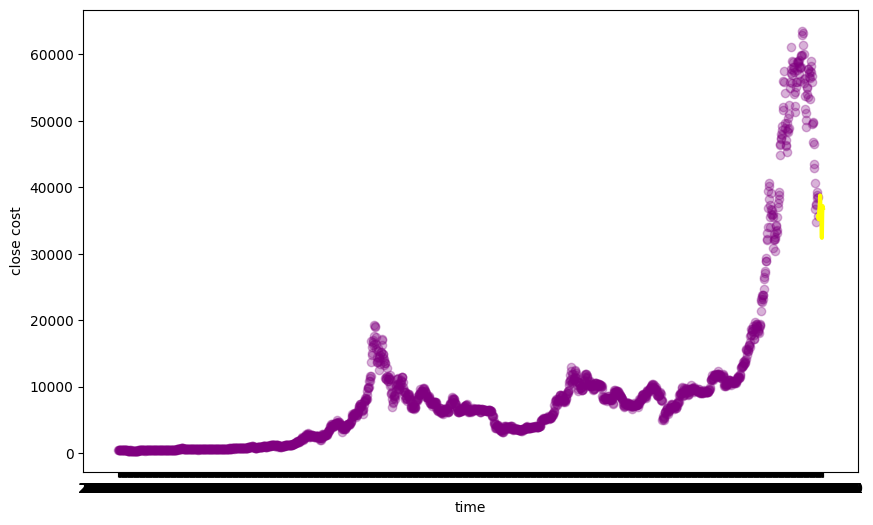

In [282]:
plt.figure(figsize=(10,6))
plt.scatter(train_data.time, y, alpha=0.3, color='purple')
X_test = test_data.drop(columns=['time', 'close'])
y_pred = regression.predict(X_test)
plt.plot(test_data.time, y_pred, color='yellow', linewidth=3)
plt.xlabel('time')
plt.ylabel('close cost');

# 6. С помощью коэффициента детерминации сравнить исходные данные 14-ти последних дней,
# которые были обрезаны перед обучением модели, и 14 дней, которые предсказала модель.

In [283]:
import sklearn.metrics as metr
metr.r2_score(test_data.close, y_pred)

0.7575715470579509

# 7. Вывести угол наклона и y-перехват.

In [284]:
print('угол наклона:', regression.coef_)
print('y-перехват:', regression.intercept_)

угол наклона: [[ 7.76003984e-01  6.79912355e-01 -4.63805743e-01 -8.01733821e-04
   1.62599041e-07  5.50209704e-03]]
y-перехват: [-4013.62351186]


# 8. Построить диаграмму рассеяния (ось х – это close, ось y – это предсказанные моделью close).

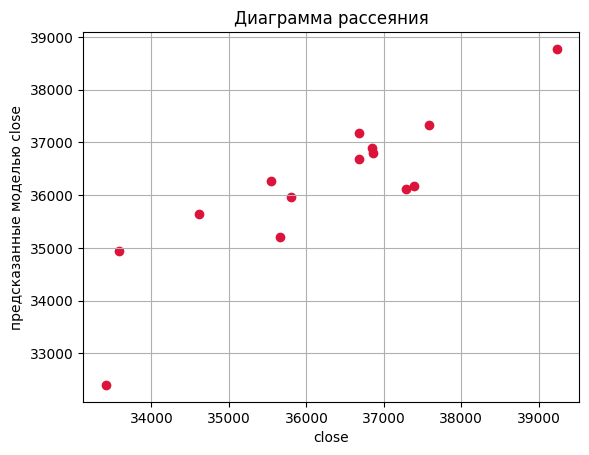

In [285]:
plt.grid(True)
plt.title('Диаграмма рассеяния')
plt.xlabel('close')
plt.ylabel('предсказанные моделью close')
plt.scatter(x=test_data.close, y=y_pred, marker='o', color='crimson')

# 9. Загрузить housePrice.csv

In [286]:
house_data = pd.read_csv('housePrice.csv')
house_data.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


# 10. Произвести предобработку данных.

In [287]:
def fl(area_):
    try:
        return float(area_)
    except Exception:
        pass

house_data['Area'] = house_data['Area'].apply(fl)
house_data['Area'].fillna(house_data['Area'].mean(), inplace=True)

In [288]:
house_data['Address'].fillna('Unknown', inplace=True)

In [289]:
house_data.isna().sum()

Area          0
Room          0
Parking       0
Warehouse     0
Elevator      0
Address       0
Price         0
Price(USD)    0
dtype: int64

In [290]:
house_data.describe()

,Area,Room,Price,Price(USD)
count,3479.000000,3479.000000,3.479000e+03,3.479000e+03
mean,106.774547,2.079908,5.359023e+09,1.786341e+05
std,69.305709,0.758275,8.099935e+09,2.699978e+05
min,30.000000,0.000000,3.600000e+06,1.200000e+02
25%,69.000000,2.000000,1.418250e+09,4.727500e+04
50%,90.000000,2.000000,2.900000e+09,9.666667e+04
75%,120.000000,2.000000,6.000000e+09,2.000000e+05
max,929.000000,5.000000,9.240000e+10,3.080000e+06


# 11. Реализовать линейную регрессию вручную, без использования библиотеки.

In [291]:
x = house_data['Area']
y = house_data['Price']

n = np.size(x)

m_x = np.mean(x)
m_y = np.mean(y)

SS_xy = np.sum([x[i] * y[i] for i in range(n)]) - n * m_y * m_x
SS_xx = np.sum(x*x) - n * m_x * m_x
b_1 = SS_xy / SS_xx
b_0 = m_y - b_1 * m_x

print('b_1:', b_1, 'b_0:', b_0)

b_1: 84427668.12377204 b_0: -3655703265.526801


# 12. Вывести угол наклона и y-перехват.

In [292]:
print('угол наклона:', b_1)
print('y-перехват:', b_0)

угол наклона: 84427668.12377204
y-перехват: -3655703265.526801


# 13. Построить диаграмму.

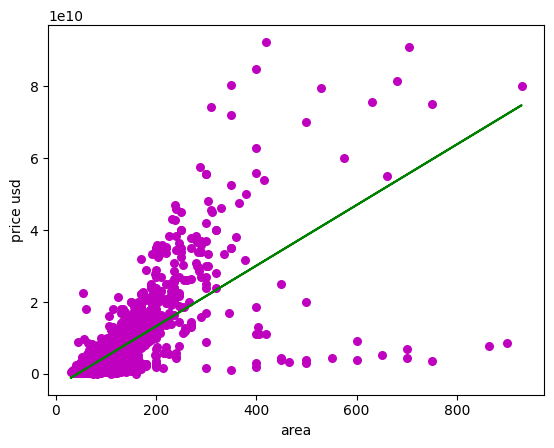

In [293]:
plt.scatter(x, y, color='m', marker='o', s = 30)
y_pred = b_0 + b_1 * x
plt.plot(x, y_pred, color='g')
plt.xlabel('area')
plt.ylabel('price usd');